# Importing Libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [110]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


# Data Related to Corona Virus affecting whole world

In [111]:
data=pd.read_csv('E://data//corona.csv')

In [112]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [113]:
data.describe(include='all')

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,770.000000,770,585,770,770,770.000000,770.000000,770.000000
unique,NaN,14,56,32,122,NaN,NaN,NaN
top,NaN,02/04/2020 22:00:00,Jilin,Mainland China,01/31/2020 19:00:00,NaN,NaN,NaN
freq,NaN,70,14,398,63,NaN,NaN,NaN
mean,385.500000,NaN,NaN,NaN,NaN,160.207792,3.436364,4.264935
std,222.424144,NaN,NaN,NaN,NaN,1015.504102,31.553727,28.718715
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,193.250000,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
50%,385.500000,NaN,NaN,NaN,NaN,8.000000,0.000000,0.000000
75%,577.750000,NaN,NaN,NaN,NaN,58.750000,0.000000,1.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
Sno               770 non-null int64
Date              770 non-null object
Province/State    585 non-null object
Country           770 non-null object
Last Update       770 non-null object
Confirmed         770 non-null float64
Deaths            770 non-null float64
Recovered         770 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 48.2+ KB


# Data wranggling (check about null values)

In [115]:
missing_data=data.isnull()


In [116]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Sno
False    770
Name: Sno, dtype: int64

Date
False    770
Name: Date, dtype: int64

Province/State
False    585
True     185
Name: Province/State, dtype: int64

Country
False    770
Name: Country, dtype: int64

Last Update
False    770
Name: Last Update, dtype: int64

Confirmed
False    770
Name: Confirmed, dtype: int64

Deaths
False    770
Name: Deaths, dtype: int64

Recovered
False    770
Name: Recovered, dtype: int64



Column Province/State has 185 null values.
fill the null values by "unknown".

In [117]:
data["Province/State"].fillna("unknown", inplace = True)  

In [118]:
data['Date'].value_counts()

02/04/2020 22:00:00    70
02/03/2020 21:40:00    69
02/01/2020 23:00:00    67
02/02/2020 21:00:00    67
01/31/2020 19:00:00    63
01/30/2020 21:30:00    59
01/29/2020 21:00:00    56
01/28/2020 23:00:00    52
01/27/2020 20:30:00    52
01/26/2020 23:00:00    47
01/23/2020 12:00:00    45
01/25/2020 22:00:00    44
01/24/2020 12:00:00    41
01/22/2020 12:00:00    38
Name: Date, dtype: int64

# No. of occurence of each date on which Corona Virus affect most

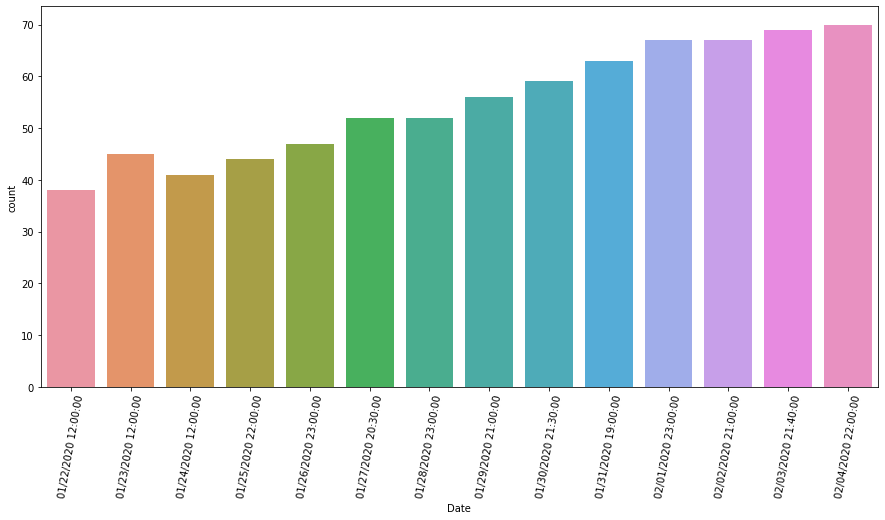

In [119]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Date',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


In [120]:
data['Province/State'].value_counts()

unknown             185
Jilin                14
Henan                14
Shaanxi              14
Chongqing            14
Xinjiang             14
Guangdong            14
Hubei                14
Jiangxi              14
Anhui                14
Inner Mongolia       14
Tianjin              14
Hebei                14
Hong Kong            14
Macau                14
Yunnan               14
Qinghai              14
Ningxia              14
Beijing              14
Liaoning             14
Heilongjiang         14
Guizhou              14
Guangxi              14
Taiwan               14
Fujian               14
Hainan               14
Jiangsu              14
Shanxi               14
Hunan                14
Shandong             14
Zhejiang             14
Sichuan              14
Shanghai             14
Gansu                14
Washington           10
Tibet                 9
New South Wales       9
Victoria              9
British Columbia      8
Ontario               8
Illinois              7
Queensland      

# All the states across world affected by Corona Virus along with their frequency

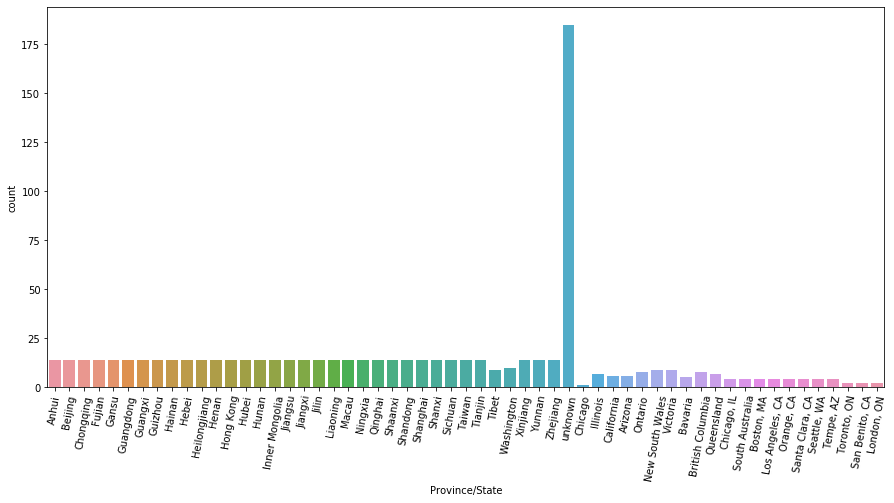

In [121]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Province/State',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


In [122]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

#Set Date column as the index column.
#data.set_index('Last Update', inplace=True)
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [123]:
data['Country'].value_counts()

Mainland China          398
US                       60
China                    34
Australia                32
Canada                   20
Thailand                 14
Japan                    14
South Korea              14
Macau                    13
Hong Kong                13
Vietnam                  13
Taiwan                   13
Singapore                13
Malaysia                 12
France                   12
Nepal                    11
Cambodia                  9
Germany                   9
Sri Lanka                 9
Finland                   7
Philippines               7
United Arab Emirates      7
Italy                     6
India                     6
Spain                     5
Sweden                    5
UK                        5
Russia                    5
Brazil                    1
Mexico                    1
Belgium                   1
Ivory Coast               1
Name: Country, dtype: int64

# All the Countries affected by Corona Virus along with their frequency.

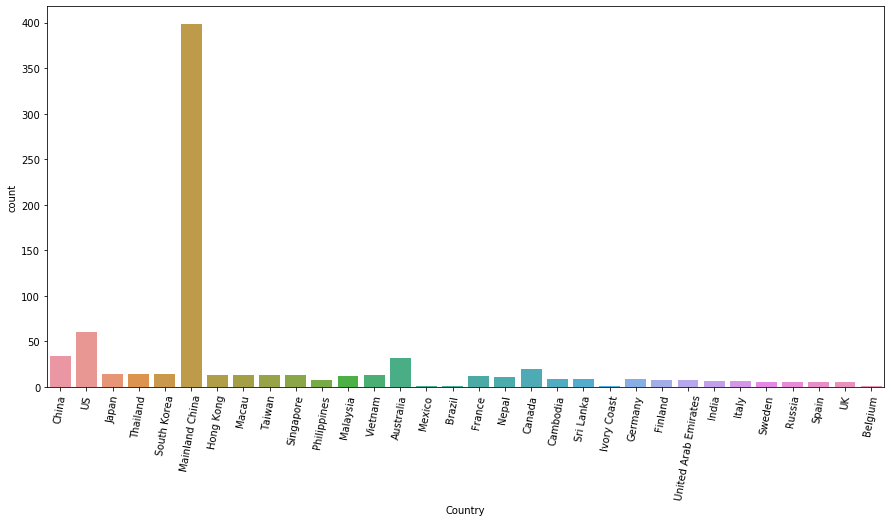

In [124]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Country',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


In [125]:
countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries affected by virus:  32


In [126]:
#Combining China and Mainland China cases

data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries affected by virus:  31


# This shows China affected most across world by corona virus

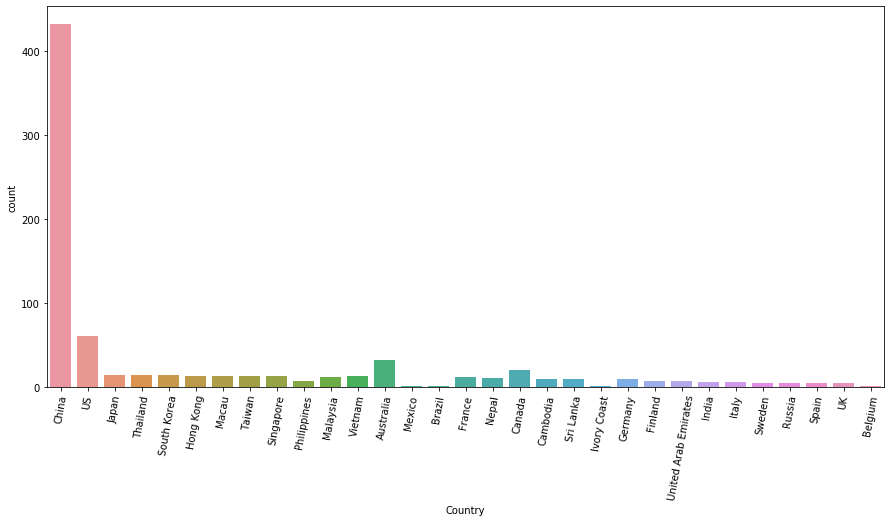

In [127]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Country',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


Scenario of Current status worldwide 

In [128]:
d = data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

from datetime import date
data_latest = data[data['Date'] > pd.Timestamp(date(year,month,day))]
data_latest.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
700,2020-02-04 22:00:00,Hubei,China,2020-04-02 23:43:00,16678.0,479.0,522.0
701,2020-02-04 22:00:00,Zhejiang,China,2020-05-02 01:33:00,895.0,0.0,63.0
702,2020-02-04 22:00:00,Guangdong,China,2020-05-02 02:03:00,870.0,0.0,32.0
703,2020-02-04 22:00:00,Henan,China,2020-05-02 01:13:00,764.0,2.0,41.0
704,2020-02-04 22:00:00,Hunan,China,2020-05-02 01:43:00,661.0,0.0,35.0


In [129]:
data_latest.describe(include='all')

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,70,70,70,70,70.000000,70.000000,70.000000
unique,1,50,28,45,NaN,NaN,NaN
top,2020-02-04 22:00:00,unknown,China,1/31/20 8:15,NaN,NaN,NaN
freq,70,21,31,5,NaN,NaN,NaN
first,2020-02-04 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-04 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,350.042857,7.028571,12.842857
std,NaN,NaN,NaN,NaN,1990.827360,57.231027,62.784110
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000


In [130]:
data_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 700 to 769
Data columns (total 7 columns):
Date              70 non-null datetime64[ns]
Province/State    70 non-null object
Country           70 non-null object
Last Update       70 non-null object
Confirmed         70 non-null float64
Deaths            70 non-null float64
Recovered         70 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 4.4+ KB


In [131]:
# Creating a dataframe with total no of confirmed cases for every country currently
Number_of_countries = len(data_latest['Country'].value_counts())

cases = pd.DataFrame(data_latest.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,13.0
2,Belgium,1.0
3,Cambodia,1.0
4,Canada,4.0
5,China,24290.0
6,Finland,1.0
7,France,6.0
8,Germany,12.0
9,Hong Kong,18.0
10,India,3.0


In [132]:
# A look at the different cases - confirmed, death and recovered currently.
print('Globally Confirmed Cases: ',data_latest['Confirmed'].sum())
print('Global Deaths: ',data_latest['Deaths'].sum())
print('Globally Recovered Cases: ',data_latest['Recovered'].sum())

Globally Confirmed Cases:  24503.0
Global Deaths:  492.0
Globally Recovered Cases:  899.0


In [133]:
# Let's look the various Provinces/States affected
data_latest.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country              Province/State                               
Australia            New South Wales        4.0     0.0        2.0
                     Queensland             3.0     0.0        0.0
                     South Australia        2.0     0.0        0.0
                     Victoria               4.0     0.0        0.0
Belgium              unknown                1.0     0.0        0.0
...                                         ...     ...        ...
US                   Santa Clara, CA        2.0     0.0        0.0
                     Seattle, WA            1.0     0.0        0.0
                     Tempe, AZ              1.0     0.0        0.0
United Arab Emirates unknown                5.0     0.0        0.0
Vietnam              unknown                8.0     0.0        1.0

[70 rows x 3 columns]

In [134]:
# Provinces where deaths have taken place
data_latest.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          490.0
Hong Kong        1.0
Philippines      1.0
Vietnam          0.0
Macau            0.0
Name: Deaths, dtype: float64

In [135]:
# Lets also look at the Recovered stats
data_latest.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
China        890.0
Thailand       5.0
Australia      2.0
Japan          1.0
Vietnam        1.0
Name: Recovered, dtype: float64

# Current scene of China

In [136]:
China = data_latest[data_latest['Country']=='China']
China

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
700,2020-02-04 22:00:00,Hubei,China,2020-04-02 23:43:00,16678.0,479.0,522.0
701,2020-02-04 22:00:00,Zhejiang,China,2020-05-02 01:33:00,895.0,0.0,63.0
702,2020-02-04 22:00:00,Guangdong,China,2020-05-02 02:03:00,870.0,0.0,32.0
703,2020-02-04 22:00:00,Henan,China,2020-05-02 01:13:00,764.0,2.0,41.0
704,2020-02-04 22:00:00,Hunan,China,2020-05-02 01:43:00,661.0,0.0,35.0
705,2020-02-04 22:00:00,Jiangxi,China,2020-05-02 01:33:00,548.0,0.0,27.0
706,2020-02-04 22:00:00,Anhui,China,2020-05-02 01:13:00,530.0,0.0,20.0
707,2020-02-04 22:00:00,Chongqing,China,2020-05-02 00:13:00,366.0,2.0,14.0
708,2020-02-04 22:00:00,Jiangsu,China,2020-05-02 02:43:00,341.0,0.0,13.0
709,2020-02-04 22:00:00,Sichuan,China,2020-05-02 00:53:00,301.0,1.0,23.0


# Confirmed and Recovered statistics of each state of china currently

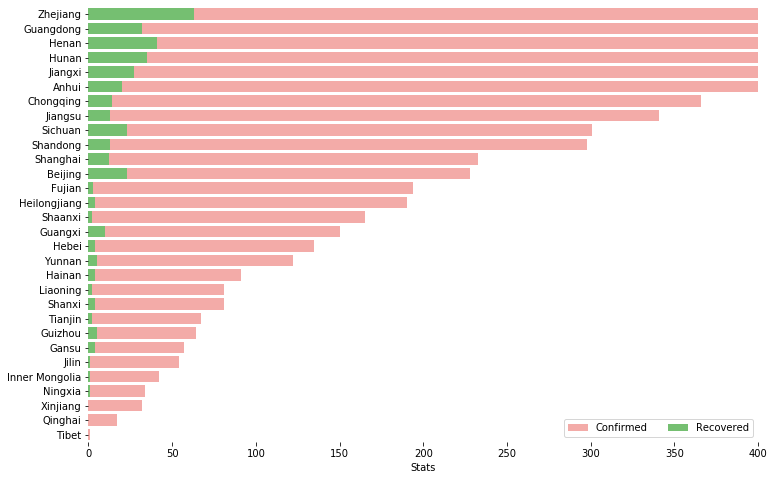

In [137]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [138]:
China['Date'].value_counts() #current status is of 4/2/2020.

2020-02-04 22:00:00    31
Name: Date, dtype: int64

In [139]:
China['Confirmed'].sum()   #Total confirm case of virus at china currently

24290.0

In [140]:
China['Deaths'].sum()    #Total death case of virus at china currently

490.0

In [141]:
China['Recovered'].sum()          #Total recover case of virus at china currently

890.0

In [142]:
China.nlargest(5, ['Confirmed'])      #top 5 states affected by corona in china currently

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
700,2020-02-04 22:00:00,Hubei,China,2020-04-02 23:43:00,16678.0,479.0,522.0
701,2020-02-04 22:00:00,Zhejiang,China,2020-05-02 01:33:00,895.0,0.0,63.0
702,2020-02-04 22:00:00,Guangdong,China,2020-05-02 02:03:00,870.0,0.0,32.0
703,2020-02-04 22:00:00,Henan,China,2020-05-02 01:13:00,764.0,2.0,41.0
704,2020-02-04 22:00:00,Hunan,China,2020-05-02 01:43:00,661.0,0.0,35.0


In [143]:
China.nlargest(5, ['Deaths'])         #top 5 states in which death occurs most by corona in china currently

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
700,2020-02-04 22:00:00,Hubei,China,2020-04-02 23:43:00,16678.0,479.0,522.0
703,2020-02-04 22:00:00,Henan,China,2020-05-02 01:13:00,764.0,2.0,41.0
707,2020-02-04 22:00:00,Chongqing,China,2020-05-02 00:13:00,366.0,2.0,14.0
714,2020-02-04 22:00:00,Heilongjiang,China,2020-05-02 01:23:00,190.0,2.0,4.0
709,2020-02-04 22:00:00,Sichuan,China,2020-05-02 00:53:00,301.0,1.0,23.0


In [144]:
China.nlargest(5, ['Recovered'])      #top 5 states in which recovery occurs most from corona in china currently

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
700,2020-02-04 22:00:00,Hubei,China,2020-04-02 23:43:00,16678.0,479.0,522.0
701,2020-02-04 22:00:00,Zhejiang,China,2020-05-02 01:33:00,895.0,0.0,63.0
703,2020-02-04 22:00:00,Henan,China,2020-05-02 01:13:00,764.0,2.0,41.0
704,2020-02-04 22:00:00,Hunan,China,2020-05-02 01:43:00,661.0,0.0,35.0
702,2020-02-04 22:00:00,Guangdong,China,2020-05-02 02:03:00,870.0,0.0,32.0


# Lets look on condition of China 

In [145]:
data_china=data[data['Country']=='China']
data_china.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [146]:
data_china.describe(include='all')

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,432,432,432,432,432.000000,432.000000,432.000000
unique,14,34,1,89,NaN,NaN,NaN
top,2020-01-22 12:00:00,Hainan,China,01/22/2020 12:00:00,NaN,NaN,NaN
freq,34,14,432,34,NaN,NaN,NaN
first,2020-01-22 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-04 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,282.256944,6.113426,7.435185
std,NaN,NaN,NaN,NaN,1343.854786,41.953113,38.052906
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,11.000000,0.000000,0.000000


In [147]:
data_china['Date'].value_counts()

2020-01-22 12:00:00    34
2020-01-30 21:30:00    31
2020-01-29 21:00:00    31
2020-02-03 21:40:00    31
2020-01-23 12:00:00    31
2020-02-04 22:00:00    31
2020-01-31 19:00:00    31
2020-02-02 21:00:00    31
2020-02-01 23:00:00    31
2020-01-28 23:00:00    30
2020-01-26 23:00:00    30
2020-01-24 12:00:00    30
2020-01-27 20:30:00    30
2020-01-25 22:00:00    30
Name: Date, dtype: int64

# No. of occurence of each date on which Corona Virus affect most in china

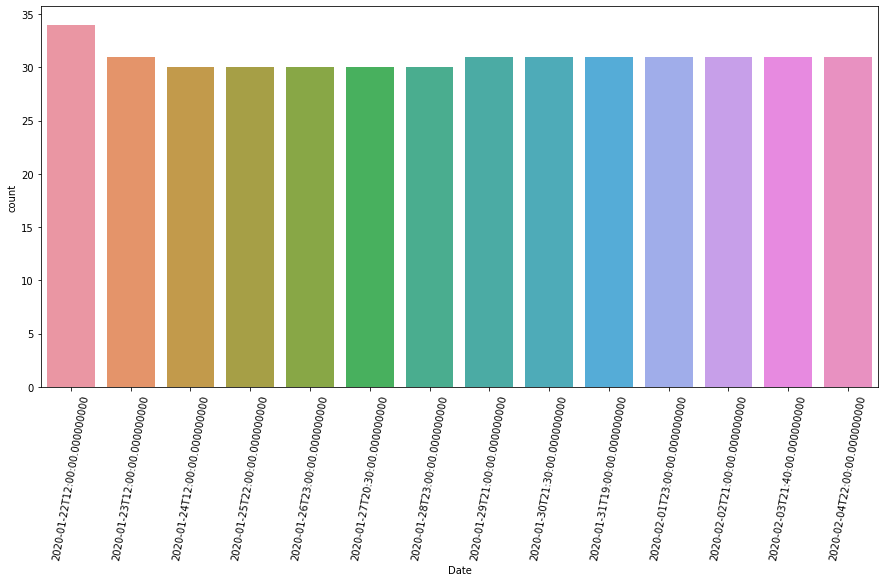

In [148]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Date',data=data_china)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


# States in China that are affected by Corona Virus

In [149]:
data_china['Province/State'].unique().tolist()

['Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang']

# Frequency of (Confirmed,Deaths,Recovered) cases in each state of china.

In [150]:
d=data_china.groupby(['Province/State']).sum()
d

,Confirmed,Deaths,Recovered
Province/State,,,
Anhui,2845.0,0.0,54.0
Beijing,1547.0,9.0,78.0
Chongqing,2380.0,8.0,37.0
Fujian,1223.0,1.0,4.0
Gansu,361.0,0.0,10.0
Guangdong,4841.0,0.0,126.0
Guangxi,998.0,0.0,29.0
Guizhou,297.0,0.0,15.0
Hainan,589.0,9.0,15.0


In [151]:
x=d['Confirmed'].sum()    #total confirm cases of corona virus in china.
x

121935.0

In [152]:
y=d['Deaths'].sum()               #total death cases of corona virus in china.
y

2641.0

In [153]:
z=d['Recovered'].sum()                #total recoveer cases of corona virus in china.
z

3212.0

In [154]:
death=y/x*100                      #Death Percentage in china
death

2.1659080657727476

In [155]:
z/x*100                #Recovery Percentage in china

2.634190347316193

# Overview of china condition due to corona virus

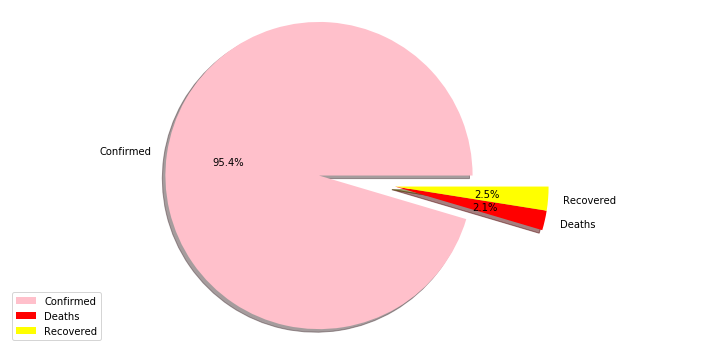

In [156]:
plt.figure(figsize=(10,5))
labels=['Confirmed','Deaths','Recovered']
colors=['pink','red','yellow']
explode=[0.5,0,0]
values=[x,y,z]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Confirmed','Deaths','Recovered'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Comaprision of statistics of Confirm and recover cases of corona at China in each state

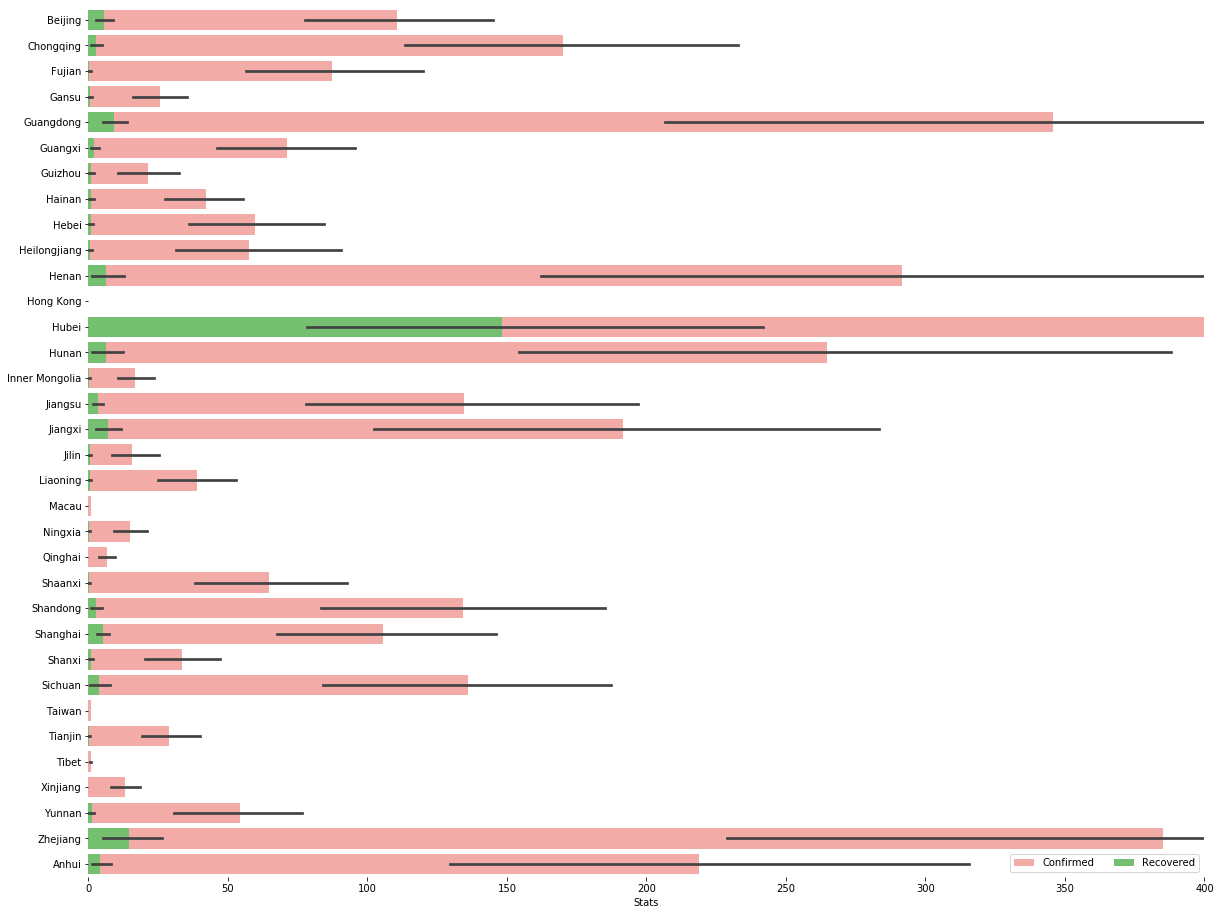

In [157]:
f, ax = plt.subplots(figsize=(20, 16))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=data_china[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=data_china[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)


In [158]:
d1=d.nlargest(5, ['Confirmed'])    
d1= d1.reset_index()
d1

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,78176.0,2546.0,2075.0
1,Zhejiang,5392.0,0.0,204.0
2,Guangdong,4841.0,0.0,126.0
3,Henan,4084.0,19.0,88.0
4,Hunan,3706.0,0.0,86.0


# top 5 states of china having most confirm cases of corona virus .

Text(0.5, 1.0, 'Corona Virus most frequent Confirmed cases in china')

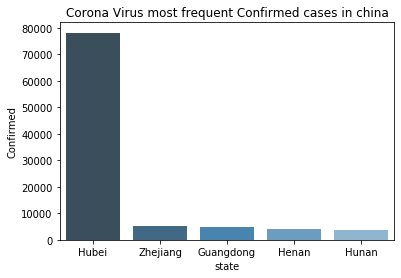

In [159]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Confirmed'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Confirmed')
plt.title('Corona Virus most frequent Confirmed cases in china')

In [160]:
d2=d.nlargest(5, ['Deaths']) 
d2=d2.reset_index()
d2

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,78176.0,2546.0,2075.0
1,Henan,4084.0,19.0,88.0
2,Heilongjiang,805.0,17.0,10.0
3,Hebei,837.0,13.0,13.0
4,Shanghai,1477.0,11.0,75.0


# top 5 states of china having most death cases of corona virus

Text(0.5, 1.0, 'Corona Virus most frequent Death cases in china')

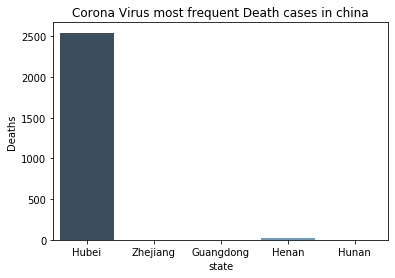

In [161]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Deaths'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Deaths')
plt.title('Corona Virus most frequent Death cases in china')

In [162]:
d3=d.nlargest(5, ['Recovered']) 
d3=d3.reset_index()
d3

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,78176.0,2546.0,2075.0
1,Zhejiang,5392.0,0.0,204.0
2,Guangdong,4841.0,0.0,126.0
3,Jiangxi,2682.0,0.0,97.0
4,Henan,4084.0,19.0,88.0


# top 5 states of china having most recover cases of corona virus

Text(0.5, 1.0, 'Corona Virus most frequent Recovered cases in china')

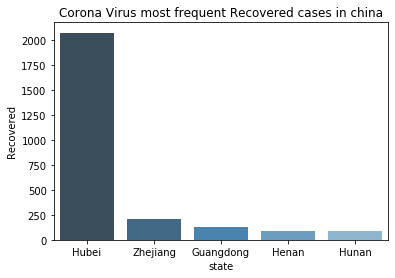

In [163]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Recovered'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Recovered')
plt.title('Corona Virus most frequent Recovered cases in china')

# see the statistics on each date of china

In [164]:
dd=data_china.groupby(['Date']).sum()
dd  

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 12:00:00,549.0,0.0,0.0
2020-01-23 12:00:00,639.0,18.0,30.0
2020-01-24 12:00:00,916.0,26.0,36.0
2020-01-25 22:00:00,1979.0,56.0,49.0
2020-01-26 23:00:00,2737.0,80.0,51.0
2020-01-27 20:30:00,4409.0,107.0,60.0
2020-01-28 23:00:00,5970.0,132.0,104.0
2020-01-29 21:00:00,7678.0,170.0,127.0
2020-01-30 21:30:00,9658.0,213.0,179.0


# Growth of confirmed cases of corona virus in China

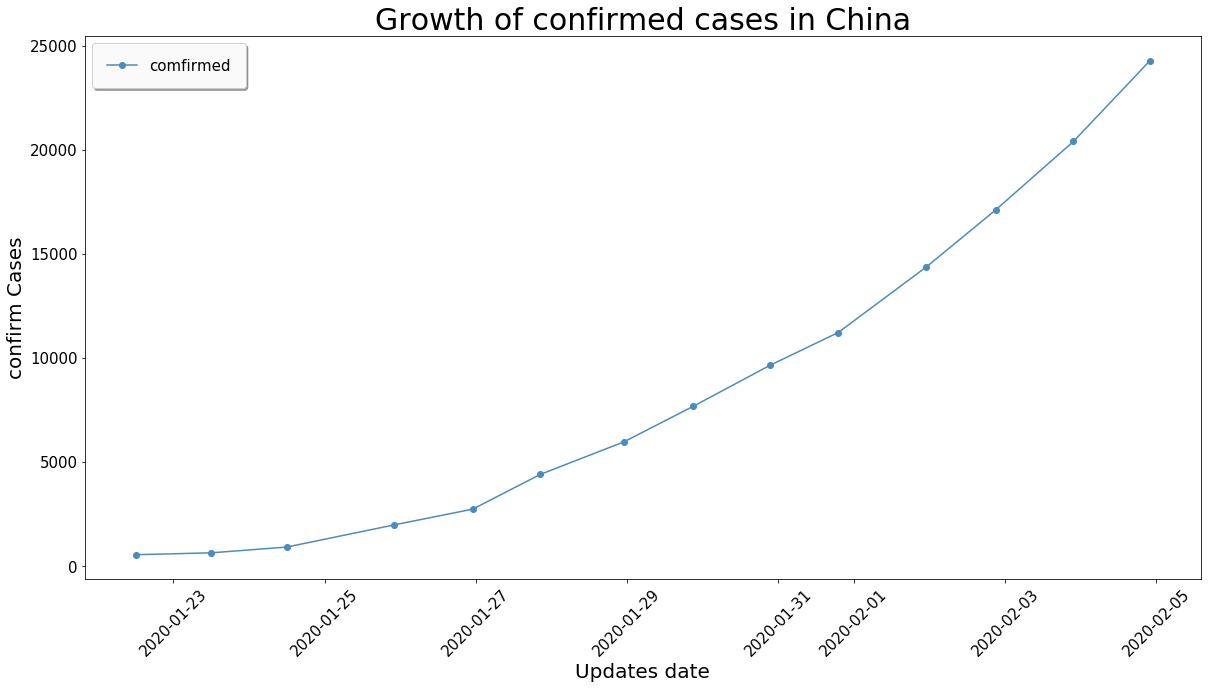

In [165]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Confirmed']
        , color = '#4b8bbe'
        , label = 'comfirmed'
        , marker = 'o')

# titles parameters
plt.title('Growth of confirmed cases in China',size=30)
plt.ylabel('confirm Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

# Above visualization showing that Corona virus spread mostly from  "28 jan 2020" exponentialy in china.

# Growth of death cases in China

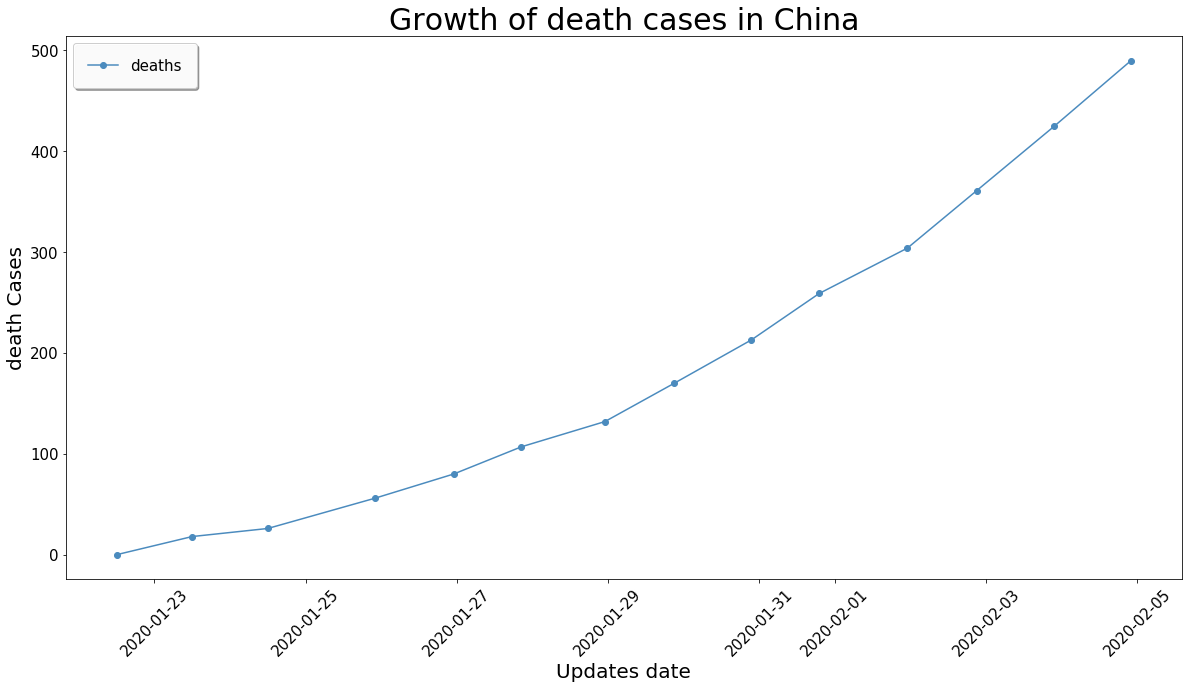

In [166]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Deaths']
        , color = '#4b8bbe'
        , label = 'deaths'
        , marker = 'o')

# titles parameters
plt.title('Growth of death cases in China',size=30)
plt.ylabel('death Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

# Death cases also incresing in china due to corona.

# Growth of recovered cases in China

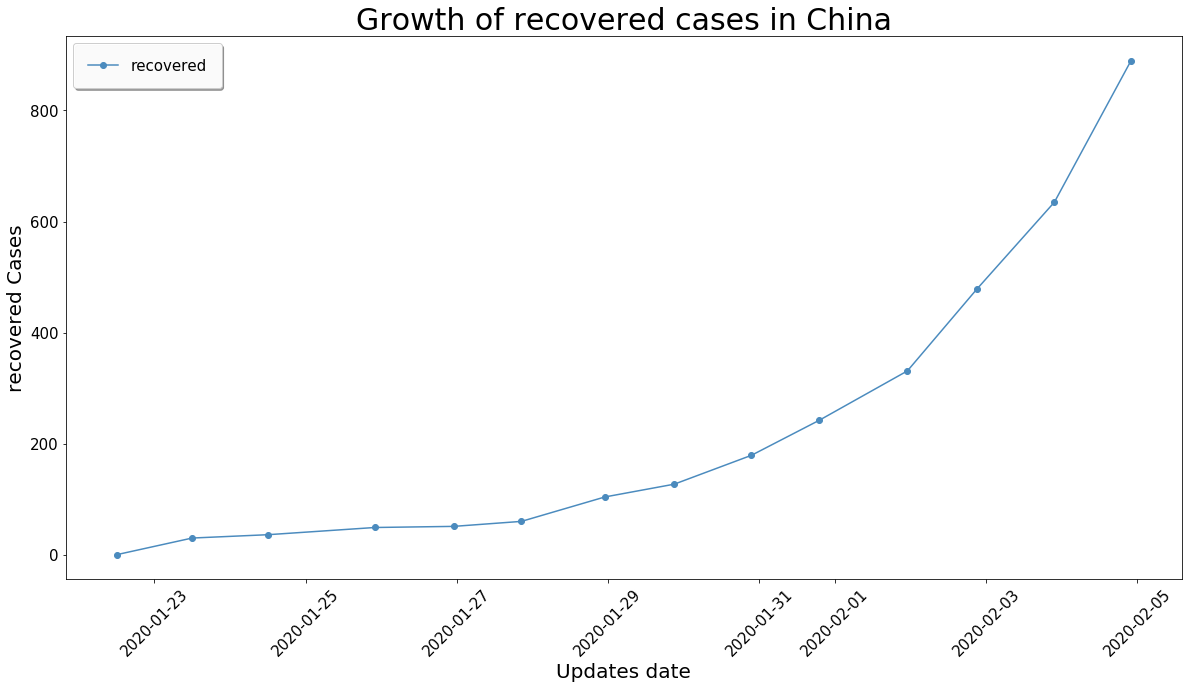

In [167]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Recovered']
        , color = '#4b8bbe'
        , label = 'recovered'
        , marker = 'o')

# titles parameters
plt.title('Growth of recovered cases in China',size=30)
plt.ylabel('recovered Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

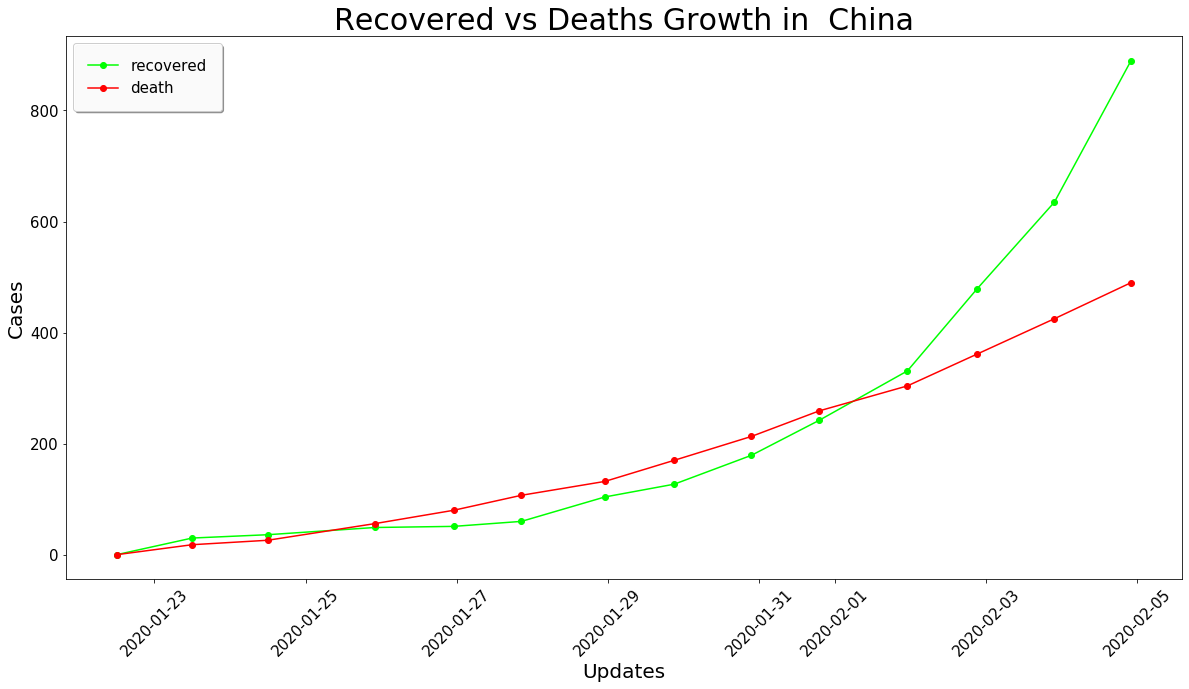

In [168]:
plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(dd['Recovered']
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')

plt.plot(dd['Deaths']
        , color = 'red'
        , label = 'death'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('Recovered vs Deaths Growth in  China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [169]:
aaa=data_china.groupby(['Province/State','Date']).sum()
aaa.head()                                                #See the stats of each state of china on each date

Confirmed  Deaths  Recovered
Province/State Date                                             
Anhui          2020-01-22 12:00:00        1.0     0.0        0.0
               2020-01-23 12:00:00        9.0     0.0        0.0
               2020-01-24 12:00:00       15.0     0.0        0.0
               2020-01-25 22:00:00       60.0     0.0        0.0
               2020-01-26 23:00:00       70.0     0.0        0.0

# A look at the different cases - confirmed, death and recovered across globe

In [170]:

print('Globally Confirmed Cases: ',data['Confirmed'].sum())
print('Global Deaths: ',data['Deaths'].sum())
print('Globally Recovered Cases: ',data['Recovered'].sum())

Globally Confirmed Cases:  123360.0
Global Deaths:  2646.0
Globally Recovered Cases:  3284.0


In [171]:
c1=data['Confirmed'].sum()
c2=data['Deaths'].sum()
c3=data['Recovered'].sum()

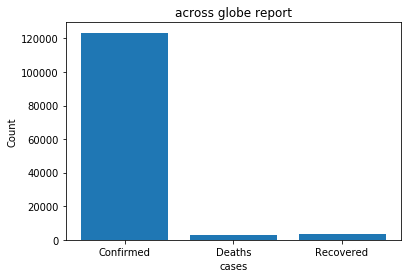

In [172]:

labels = ('Confirmed','Deaths','Recovered')
x_index = [0,1,2]

# indexes is the first parameter 
plt.bar(x_index, [c1,c2,c3], width = 0.8, align='center', alpha=1.0)

# First Parameters is the indexes and second paramters is the labels
plt.xticks(x_index, labels)

plt.xlabel('cases')
plt.ylabel('Count')

plt.title('across globe report')
 
plt.show()

# Overview of whole globe condition due to corona virus

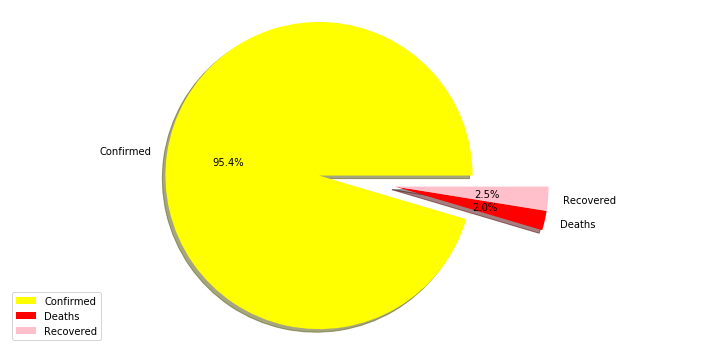

In [173]:
plt.figure(figsize=(10,5))
labels=['Confirmed','Deaths','Recovered']
colors=['yellow','red','pink']
explode=[0.5,0,0]
values=[c1,c2,c3]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Confirmed','Deaths','Recovered'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [174]:
# Creating a dataframe with total no of confirmed cases for every country
Number_of_countries = len(data['Country'].value_counts())


cases = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,92.0
2,Belgium,1.0
3,Brazil,0.0
4,Cambodia,9.0
5,Canada,29.0
6,China,121935.0
7,Finland,7.0
8,France,55.0
9,Germany,62.0
10,Hong Kong,130.0


# confirm cases of corona across each country

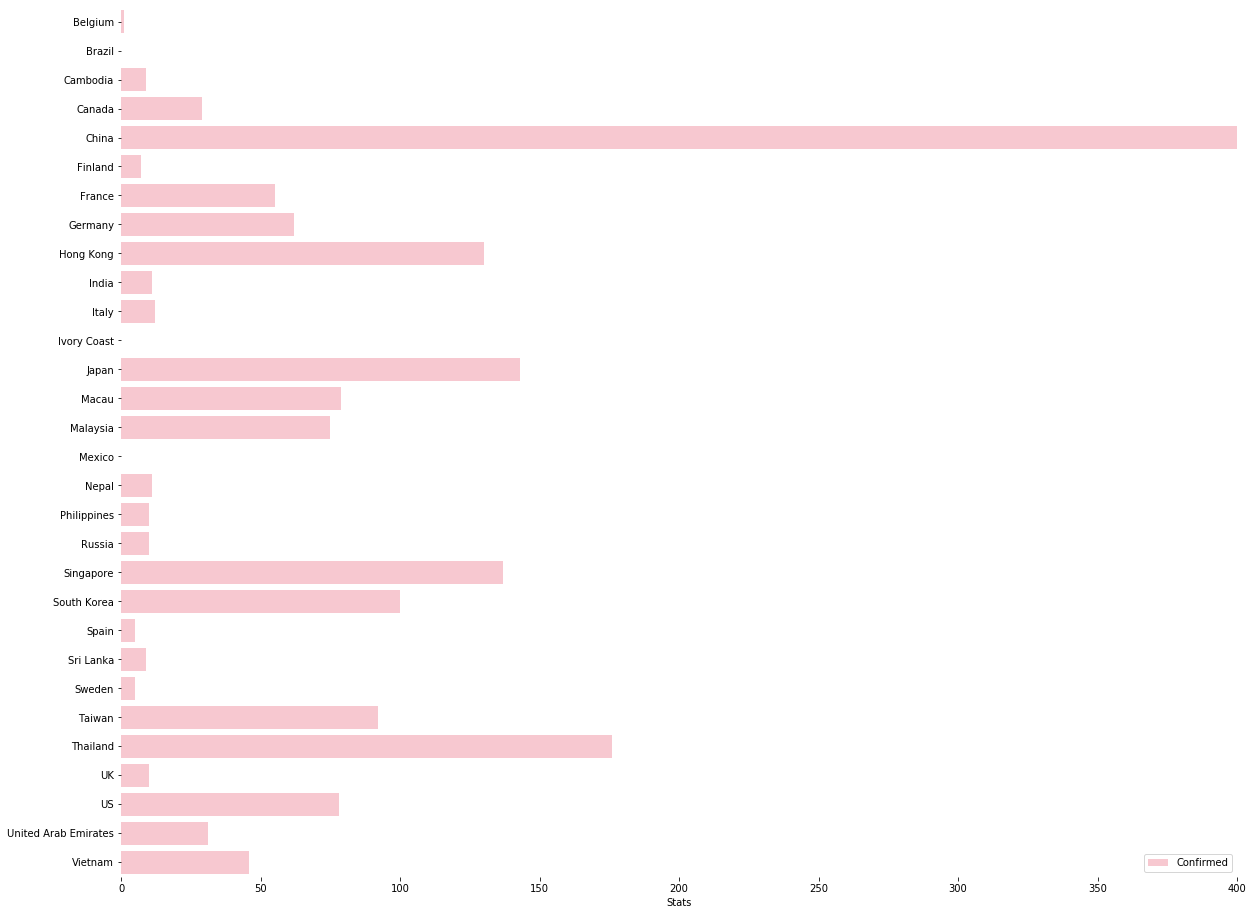

In [175]:
f, ax = plt.subplots(figsize=(20, 16))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country", data=global_cases[1:],
            label="Confirmed", color="pink")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)


# total no of confirmed,death,recover cases for every country

In [176]:
ddd=data.groupby(['Country']).sum()

In [177]:
ddd

,Confirmed,Deaths,Recovered
Country,,,
Australia,92.0,0.0,12.0
Belgium,1.0,0.0,0.0
Brazil,0.0,0.0,0.0
Cambodia,9.0,0.0,0.0
Canada,29.0,0.0,0.0
China,121935.0,2641.0,3212.0
Finland,7.0,0.0,0.0
France,55.0,0.0,0.0
Germany,62.0,0.0,0.0


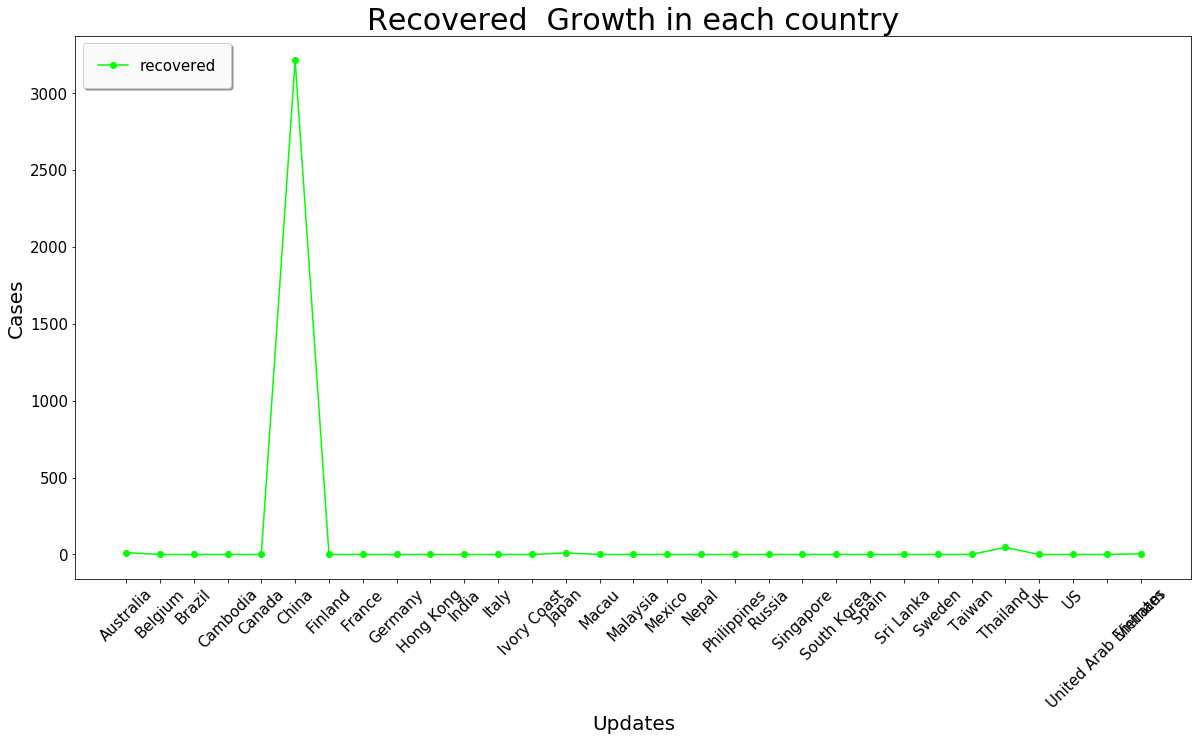

In [178]:
plt.figure(figsize=(20
                    ,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(ddd['Recovered']
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('Recovered  Growth in each country',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

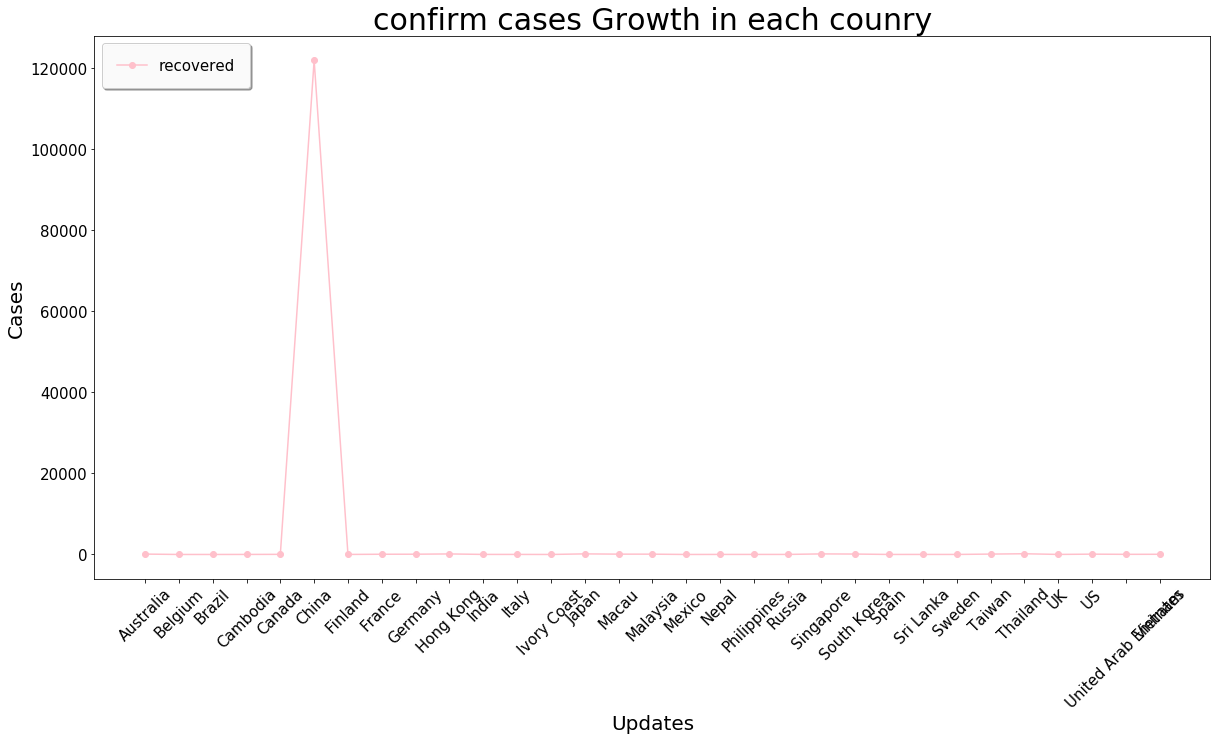

In [179]:
plt.figure(figsize=(20
                    ,10))

plt.plot(ddd['Confirmed']
        , color = 'pink'
        , label = 'recovered'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('confirm cases Growth in each counry',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

Let's create a new dataframe which consists of the latitude and longitudes of the countries under observation

In [180]:
world_coordinates=pd.read_csv('E://data//world_coordinates.csv')

In [181]:
world_coordinates.head()

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [182]:
world_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
Code         243 non-null object
Country      244 non-null object
latitude     244 non-null float64
longitude    244 non-null float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [183]:
world_coordinates.describe(include='all')

,Code,Country,latitude,longitude
count,243,244,244.000000,244.000000
unique,243,244,NaN,NaN
top,KI,Luxembourg,NaN,NaN
freq,1,1,NaN,NaN
mean,NaN,NaN,16.253109,13.294814
std,NaN,NaN,27.031206,73.976477
min,NaN,NaN,-75.250973,-177.156097
25%,NaN,NaN,-0.301710,-38.092008
50%,NaN,NaN,16.869235,18.182149
75%,NaN,NaN,38.965238,49.046734


In [184]:
# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='Country')
world_data.head()

,Code,Country,latitude,longitude,Confirmed
0,AE,United Arab Emirates,23.424076,53.847818,31.0
1,AU,Australia,-25.274398,133.775136,92.0
2,BE,Belgium,50.503887,4.469936,1.0
3,BR,Brazil,-14.235004,-51.925280,0.0
4,CA,Canada,56.130366,-106.346771,29.0


In [185]:
world_data.describe(include='all')

,Code,Country,latitude,longitude,Confirmed
count,30,30,30.000000,30.000000,30.000000
unique,30,30,NaN,NaN,NaN
top,LK,Macau,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN
mean,NaN,NaN,28.800736,53.594372,4112.000000
std,NaN,NaN,22.062582,73.427842,22253.269122
min,NaN,NaN,-25.274398,-106.346771,0.000000
25%,NaN,NaN,14.511251,5.965333,9.250000
50%,NaN,NaN,26.046334,82.447902,30.000000
75%,NaN,NaN,45.138713,107.537588,88.750000


In [186]:
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

# created the above map by using Folium Maps. You can click on the red bubbles to get information about the region and the number of confirmed cases there.

In [187]:
China_states_coordinates=pd.read_csv('E://data//China_states_coordinates.csv')
China_states_coordinates.head()

,States,Latitude,Longitude
0,Anhui,33.25,115.35
1,Beijing,39.54,115.79
2,Chongqing,31.05,109.52
3,Fujian,26.23,117.58
4,Gansu,39.83,97.73


In [188]:
latitude = 39.91666667
longitude = 116.383333
 
# create map and display it
china_map = folium.Map(location=[latitude, longitude], zoom_start=12)

china_coordinates= pd.read_csv("E://data//China_states_coordinates.csv")
china_coordinates.rename(columns={'States':'Province/State'},inplace=True)
df_china_virus = data_china.merge(china_coordinates)

# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'name':list(df_china_virus['Province/State']),
   'lat':list(df_china_virus['Latitude']),
   'lon':list(df_china_virus['Longitude']),
   'Confirmed':list(df_china_virus['Confirmed']),
   'Recovered':list(df_china_virus['Recovered']),
   'Deaths':list(df_china_virus['Deaths'])
})

data.head()

,name,lat,lon,Confirmed,Recovered,Deaths
0,Anhui,33.25,115.35,1.0,0.0,0.0
1,Anhui,33.25,115.35,9.0,0.0,0.0
2,Anhui,33.25,115.35,15.0,0.0,0.0
3,Anhui,33.25,115.35,60.0,0.0,0.0
4,Anhui,33.25,115.35,70.0,0.0,0.0


In [189]:
data

,name,lat,lon,Confirmed,Recovered,Deaths
0,Anhui,33.25,115.35,1.0,0.0,0.0
1,Anhui,33.25,115.35,9.0,0.0,0.0
2,Anhui,33.25,115.35,15.0,0.0,0.0
3,Anhui,33.25,115.35,60.0,0.0,0.0
4,Anhui,33.25,115.35,70.0,0.0,0.0
...,...,...,...,...,...,...
368,Zhejiang,28.85,121.12,537.0,14.0,0.0
369,Zhejiang,28.85,121.12,661.0,23.0,0.0
370,Zhejiang,28.85,121.12,724.0,36.0,0.0
371,Zhejiang,28.85,121.12,829.0,48.0,0.0


In [190]:
data.describe(include='all')

,name,lat,lon,Confirmed,Recovered,Deaths
count,373,373.000000,373.000000,373.000000,373.000000,373.000000
unique,27,NaN,NaN,NaN,NaN,NaN
top,Hainan,NaN,NaN,NaN,NaN,NaN
freq,14,NaN,NaN,NaN,NaN,NaN
mean,NaN,33.148552,113.641823,324.337802,8.565684,7.080429
std,NaN,7.704353,7.891759,1441.983755,40.843777,45.081574
min,NaN,18.260000,88.780000,0.000000,0.000000,0.000000
25%,NaN,27.680000,109.520000,15.000000,0.000000,0.000000
50%,NaN,32.570000,115.350000,60.000000,1.000000,0.000000
75%,NaN,39.230000,119.380000,168.000000,3.000000,0.000000


In [191]:
# create map for total confirmed cases in china till date
china_map1 = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Confirmed'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=13,
                        popup = ('Province: ' + str(name).capitalize() + '<br>'
                        'Confirmed: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(china_map1)
    folium.Map(titles='jj', attr="attribution")    
china_map1

In [192]:
china_map = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Deaths'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.2,
                        popup = ('Province: ' + str(name).capitalize() + '<br>'
                        'Deaths: ' + str(value) + '<br>'),
                        color='black',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(china_map)
    folium.Map(titles='jj', attr="attribution")    
china_map